# <center>TMDB movie data analysis</center>
## <center> by</center>
# <center> Shedrack David </center>

## Overview

The Movie Database (TMDb) is a popular, user editable database for movies and TV shows.This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Dataset Overview

There are about 10,000 movies collected from The Movie Database (TMDb) with features:

- id
- imdb_id
- popularity
- budget
- revenue
- original_title
- cast	director
- overview
- runtime
- genres
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj
- revenue_adj
- vote_levels


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.patches as mpatches

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
#creating a bin edge value and name for a new column
vals = [10, 179, 439, 1173, 9767]
val_names = ['poor', 'moderate', 'mod_high', 'high']

#creating new column
data_frame['vote_levels'] = pd.cut(data_frame['vote_count'], vals, labels=val_names)

In [3]:
# load in the dataset into a pandas dataframe
data_frame = pd.read_csv('TMDB-movies-clean.csv')
#converting release date column to date time 
data_frame['release_date'] = pd.to_datetime(data_frame['release_date'])

## Properties associated with movies that have high revenues

### Popularity

During my investigation, popular movies tend to generate high revenue almost all the time. there is a strop positive relationship between popularity and revenue with very little outliers

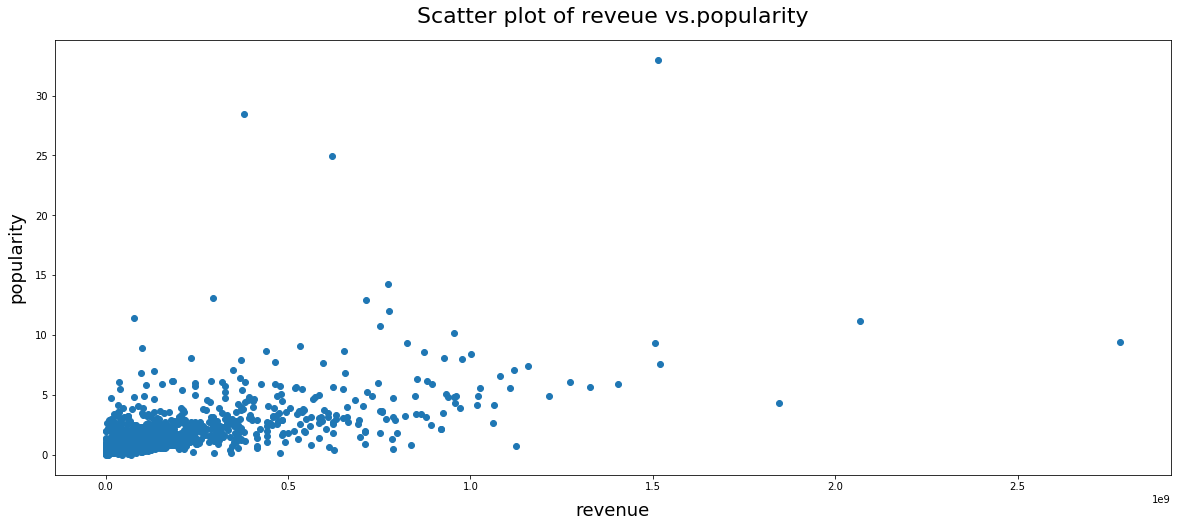

In [4]:
plt.figure(figsize = [20, 8]);
plt.scatter(data = data_frame, x ='revenue' , y = 'popularity')
plt.title('Scatter plot of reveue vs.popularity', fontsize=22, y=1.025)
plt.xlabel('revenue', labelpad=10, fontsize=18)
plt.ylabel('popularity', labelpad=10, fontsize=18)


plt.show();

## Vote count

For this investigation, i feature engineered this variable for smoother and faster investigation; first, i created a bin edge value and name for a new column, the bin edge held the minimum, 25%, 50%, 75% and maximum values of the votes and i labeled them as 'poor', 'moderate', 'moderate-high' and 'high' respectively, then i cut the vote counts and grouped them by these labels; the feature added was named as vote_labels

for the plot, i grouped the vote_labels with average revenue

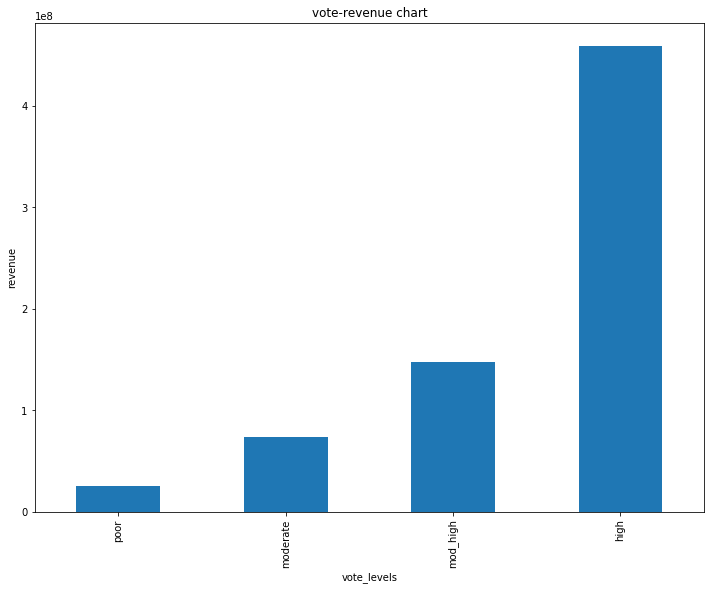

In [7]:
#grouping movies with revenue by votes 
plt.figure(figsize=[12, 9])
data_frame.groupby("vote_levels").revenue.mean().plot(kind='bar', y='revenue', title='vote-revenue chart');
plt.ylabel("revenue");

## Budget

From my exploration, the seem to be a very stong positive correlation between budget and revenue. high budget movies tend tp generate high revenue.

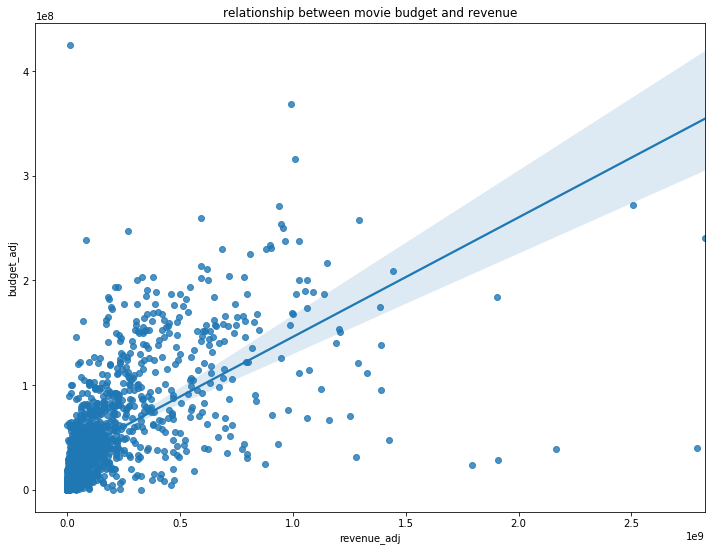

In [8]:
# is there a correllation between high budget movies and high revenue?
plt.figure(figsize=[12, 9])
sns.regplot(x='revenue_adj', y='budget_adj', data=data_frame).set(title='relationship between movie budget and revenue');

## Runtime

There is a slightly moderate strong correlation between revenue and runtime, so on average, movies that generated high revenue tend to have longer runtime.

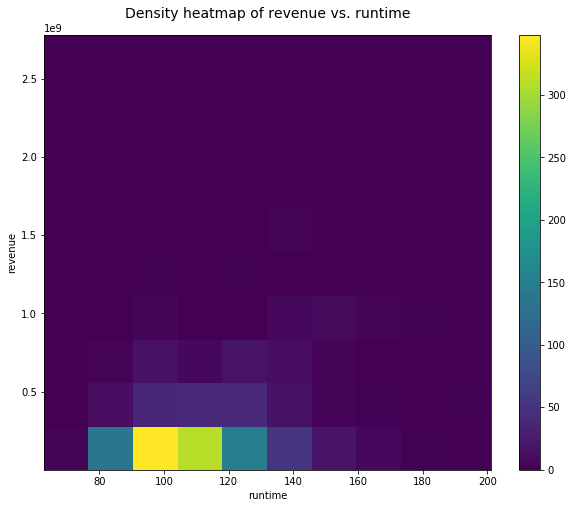

In [9]:
# density heatmap of revenue vs. runtime
plt.figure(figsize = [10, 8])
plt.hist2d(data = data_frame, x ='runtime' , y = 'revenue')
plt.title('Density heatmap of revenue vs. runtime', fontsize=14, y=1.025)
plt.xlabel('runtime')
plt.ylabel('revenue')
plt.colorbar()
plt.show()

## most popular ,ovie genres from year to year

From what i observed, Adventure, Action, Science fiction and Thriller has been the the most popular genre of movie release from year to year since 1980.
also, among the top 10 movie genres, "action" is the most popular and it appears even among a mix movie genre

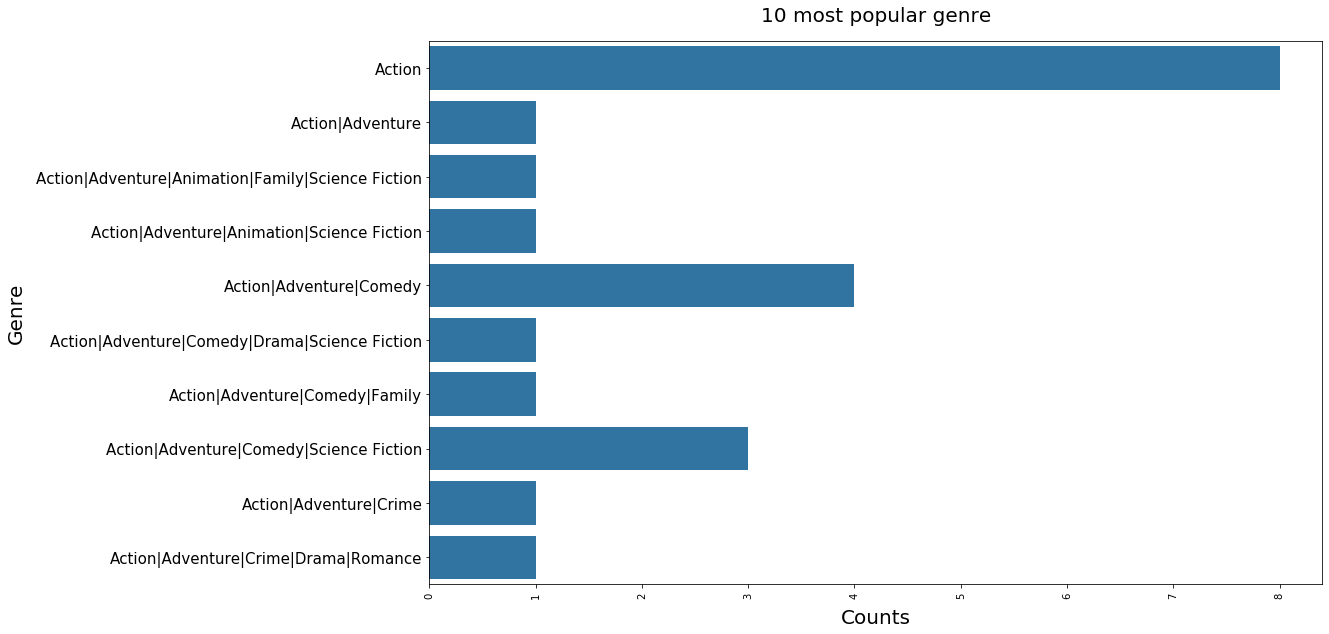

In [13]:
top_genres = data_frame["genres"].value_counts().sort_index()[:10]
dc = sns.color_palette()[0]

rcParams['figure.figsize'] = 16,10
sns.barplot(x=top_genres, y=top_genres.index, color=dc)
plt.title('10 most popular genre', fontsize=20, y=1.025)
plt.xlabel('Counts', labelpad=10, fontsize=20)
plt.ylabel('Genre', labelpad=10, fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=90);

## Movie release per year

The year 2010 and 2011 had the most movie release.
Most movies were released in the 21st century and there has been a steady inclease in movie release since the year 2000; there was a slight drop in 2009 but the progression continued until 2012 and 2013 which had a dramatic drop in release, i don't have enough data to deduce the reason for thish drop yet.


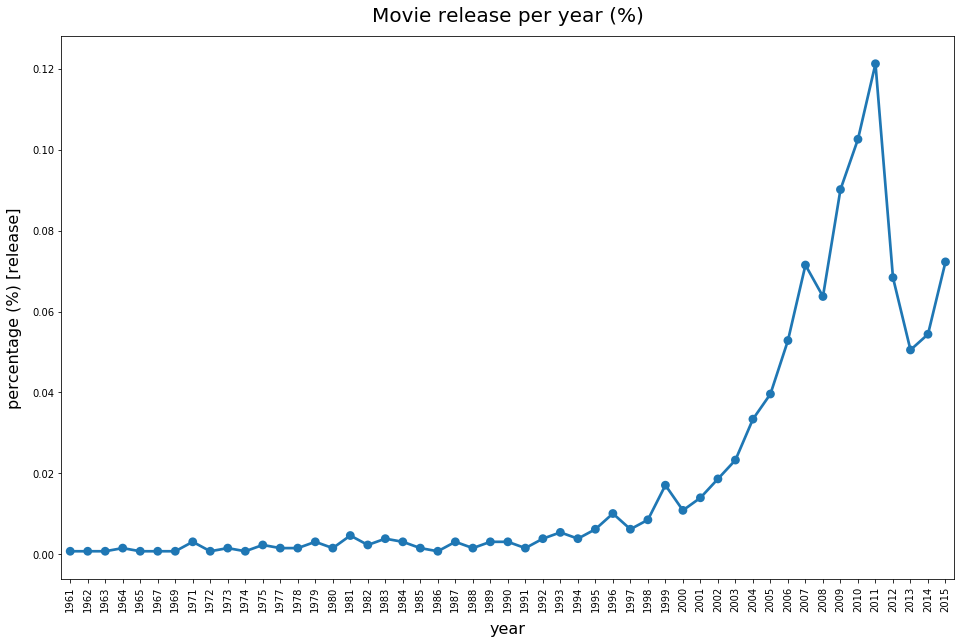

In [14]:
#year with most movie release
release_per_year = (data_frame['release_year'].value_counts().sort_index())/data_frame.shape[0]
# Point plot for yearly release
sns.pointplot(x=release_per_year.index, y=release_per_year.values, color = dc);
plt.title('Movie release per year (%)', fontsize=20, y=1.015)
plt.xlabel('year', labelpad=10, fontsize=16)
plt.ylabel('percentage (%) [release]', labelpad=10, fontsize=16);
plt.xticks(rotation='vertical');

## Revenue, Runtime and vote vote count relationship

movies which had poor revenue had a high number of poor votes and it's runtime was shorter, the opposite is the case for movies which generated high revenue.

movies that have high revenue tend to be longer in and have no poor votes with very little people voting it as moderate.

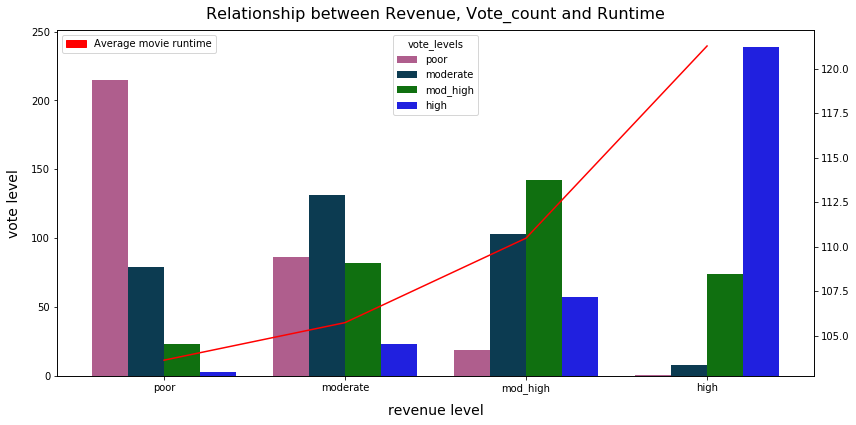

In [17]:
li = [4.300000e+01, 2.565097e+07, 8.208716e+07, 2.140694e+08, 2.781506e+09]
li_names = ['low rev', 'mod rev', 'mod_high rev', 'high rev']
rev_lev = pd.cut(data_frame['revenue'], li, labels=li_names)

avg_runtime = data_frame.groupby(["vote_levels"]).agg(mean_runtime=("runtime", "mean"))

rcParams['figure.figsize'] = 12,6
g = sns.countplot(data=data_frame, x=rev_lev, hue='vote_levels', palette=['#bc5090', '#003f5c','g', 'b'])
plt.title('Relationship between Revenue, Vote_count and Runtime', fontsize=16, y=1.015)
plt.xlabel('revenue level', labelpad=10, fontsize=14)
plt.ylabel('vote level', labelpad=10, fontsize=14)


#creating secondary y axis
ax = g.twinx()
ax.plot(avg_runtime, color='r')

# Creating artists specifically for adding to the legend (Proxy artists)
avg_movie_runtime= mpatches.Patch(color='r', label='Average movie runtime')
plt.legend(handles=[avg_movie_runtime])
plt.tight_layout()
plt.show();

In [20]:
# Create HTML slides without showing the code:
!jupyter nbconvert TMDB_movie_data_explanatory_analysis.ipynb --to slides --no-input

[NbConvertApp] Converting notebook TMDB_movie_data_explanatory_analysis.ipynb to slides
[NbConvertApp] Writing 628293 bytes to TMDB_movie_data_explanatory_analysis.slides.html
